In [2]:
import pandas
import seaborn
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
print(chipotle_data.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [4]:
chipotle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
chipotle_data.describe() #show statistics

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [6]:
unique_items= chipotle_data.groupby("item_name")["quantity"].sum()
most_ordered_quantity= unique_items.max()
most_ordered_item= unique_items.idxmax()
print(most_ordered_item, most_ordered_quantity)

Chicken Bowl 761


In [7]:
## Total Revenue
processed_prices = chipotle_data["item_price"].str.replace('$', '').astype(float)
total_revenue = processed_prices.sum()
print(total_revenue)

34500.16


In [8]:
chipotle_data["order_id"].nunique()

1834

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


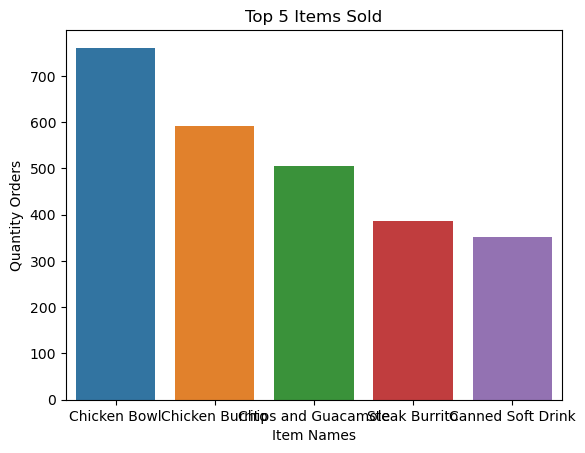

In [12]:
top_five_items = unique_items.nlargest(5) #top 5 items sold
print(top_five_items)

seaborn.barplot(x=top_five_items.index, y=top_five_items.values)
plt.xlabel("Item Names")
plt.ylabel("Quantity Orders")
plt.title("Top 5 Items Sold")
plt.show()